In [8]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

train_data = datasets.FashionMNIST(
    root= "data",
    train=True,
    download =True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

class_names = train_data.classes

In [ ]:
# prepare DataLoader
# DataLoader helps load data into a model, it turns a large Dataset into a Python iterable of smaller chunks  (chunk : 큰 데이터를 작게 나눈 조각)
# These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter
# When using really large datasets, unless you've got infinite computing power, it's easeier to break them up into batches. It also gives your model more opportunities to improve
# With mini-batches(small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch)
# What's good batch size? -> 32 is a good place to start for a fair amount of problems.
# But since this is a hyperparameter you can try all different kinds of values, though generally powers of 2(2의 거듭제곱 값) are use most often

from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle=True) # dataset to turn into iterable
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False) # don't necessarily have to shuffle the testing data

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000024626949D80>, <torch.utils.data.dataloader.DataLoader object at 0x0000024627B3F700>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [6]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


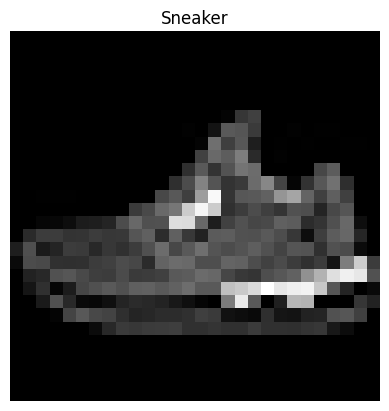

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()  # size를 리스트로 받는 이유는 다차원 텐서를 만들 수 있도록 되어있기 때문
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [12]:
# Model 0 : Build a baseline model

# nn.Flatten() : compresses the dimensions of a tensor into a single vector (텐서의 여러 차원을 하나의 벡터로 압축해줌)
flatten_model = nn.Flatten()

x = train_features_batch
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

print(x)
print(output)

# nn.Flatten() layer took out shape from [color_channels, height, width] to [color_channels, height*width]
# Turned the pixel data from height and width dimensions into one long feature vector. And nn.Linear() layer like their inputs to be in the form of feature vectors

Shape before flattening: torch.Size([32, 1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([32, 784]) -> [color_channels, height*width]
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5020, 0.0196, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.1373, 0.0549, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


  

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels, 28*28형태의 이미지 -> [784]크기의 벡터)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)
    
# input_shape = 784 : this is how many features goin in the model (in our case, it's one for every pixel in the target image)
# hidden_units = 10 : number of units/neurons in the hidden layer(s)
# output_shape = len(class_names) : Since working with a multi-class classification problem, we need an ouput neuron per class in our dataset

torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, 
                              hidden_units=10, 
                              output_shape=len(class_names)) # one for every class
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# setup loss, optimizer and evaluation metrics
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")  # Need the "raw" GitHub URL for this to work
    print(type(request))
    with open("helper_functions.py","wb") as f:
        f.write(request.content) # .text로 저장할 수도 있지만 .content가 어떤 종류의 파일이든 안전하게 저장 가능하므로 사용(원본 바이트 그대로 가져오기 때문)

# requests.get : 웹 주소로 GET 요청을 보내, .py파일의 소스 코드 내용을 텍스트로 반환받음 (request는 Response 객체가 됨)
# f.write : 파일에 다운로드한 코드 저장
# request.content : 요청 받은 데이터의 바이너리 형태(bytes)
request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")  # Need the "raw" GitHub URL for this to work
print(type(request))

helper_functions.py already exists, skipping download
<class 'requests.models.Response'>


In [22]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # loss function은 criterion, cost function이라고 불리기도 함
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [24]:
# creating a function to time our experiments  # timeit.default_timer()

from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
# Creating a training loop and training a model on batches of data

# Since computing on batches of data, loss and evaluation metrics will be calculated per batch rather than across the whole dataset (손실 함수나 평가 지표는 배치 단위로 계산됨)
# This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader (손실과 정확도 값을 각 데이터셋의 dataloader의 수로 나눠야함)
# 1. Loop through epochs 
# 2. Loop through training batches, perform training steps, calculate the train loss per batch
# 3. Loop through testing batches, perform testing steps, calculate the test loss per batch
# 4. Print out what's happening
# 5. Time it all(for fun)
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer() # 훈련 시작 시점 시간 저장

epochs = 3
for epoch in tqdm(range(epochs)):  # progress bar 표기 (루프 진행 상황)
    print(f"Epoch: {epoch}\n--------------")
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        # calculate loss (per batch)  (각 배치에 대한 손실을 누적해서 train loss에 더함)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%400 ==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")  # len(X)는 입력 데이터(32크기의 batch)이므로 32가 나옴
            
    train_loss /= len(train_dataloader)   # train_loss를 batch 수로 나눠서 평균 손실로 만듦    # len(train_dataloader)는 1875임, 60000개의 데이터셋을 32 크기의 batch로 묶은 개수

    test_loss, test_acc = 0,0

    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            test_pred = model_0(X)
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        # 배치 수로 나눠 평균 손실, 평균 정확도 계산
        test_loss /= len(test_dataloader) 
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device =str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:21, 10.88s/it]


Train loss: 0.42655 | Test loss: 0.45735, Test acc: 84.02%

Epoch: 1
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:22<00:11, 11.05s/it]


Train loss: 0.42340 | Test loss: 0.45961, Test acc: 84.20%

Epoch: 2
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:33<00:00, 11.15s/it]


Train loss: 0.41963 | Test loss: 0.46264, Test acc: 83.99%

Train time on cpu: 33.456 seconds


In [30]:
print(len(train_dataloader))

1875
